### Basic Indexing and slicing

In [ ]:
import numpy as np
arr = np.arange(10)
arr

In [ ]:
arr[5:8]

In [ ]:
#storing the sliced array

arr_sliced = arr[5:8]

In [ ]:
arr_sliced

In [ ]:
arr_sliced[1] = 12345

In [ ]:
arr

In [ ]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d.shape
old_values = arr3d[0].copy()

In [ ]:
arr3d[0] = 42
arr3d
arr3d[0] = old_values

In [ ]:
x = arr3d[1]
x

In [ ]:
x[0]

In [ ]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr2d)

In [ ]:
arr2d[:2,1:]
lower_dim_slice = arr2d[1, :2]
lower_dim_slice

### Fancy Indexing


In [ ]:
#declaring a 8x4 matrix
arr = np.zeros((8,4))
arr
for i in range(8):
    arr[i] = i

In [ ]:
arr

In [ ]:
arr[[0,1,2]]

In [ ]:
arr[[-2,-5,-7]]

In [ ]:
#selecting different elements out of an array
arr = np.arange(32).reshape((8,4))
arr

In [ ]:
arr[[1,5,7,2],[0,3,1,2]]

In [ ]:
arr[[1,5,7,2]][:,[0,3,1,2]]

In [ ]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

In [ ]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]] = 0
arr

### Transposing Arrays and Swapping Axes

In [ ]:
arr = np.array([[0, 1, 0], [1, 2, -2], [6, 3, 2], [-1, 0, -1], [1, 0, 1]])
#dot product of array
np.dot(arr.T,arr)

In [ ]:
#also a dot product    
#The @ operator is also known as infix operatior

arr.T@arr

In [ ]:
print(arr) 
print(arr.swapaxes(0,1))    #also a transpose method
print(arr.T)                #Transpose with T

### Pseudorandom Number Generation

In [ ]:
arr = np.random.standard_normal(size=(4,4))

In [ ]:
arr.T@arr

In [ ]:
#comparing python builtin vs 
#np.random
N = 1_000_000
from random import normalvariate
%timeit samples= [normalvariate(0,1) for i in range(N)]

In [ ]:
#now using the numpy function

samples2 = [np.random.standard_normal() for _ in range(N)]

In [ ]:
I = np.zeros((2,3))
for i in range(len(I)):
    I[i] = i

I

In [ ]:
np.arange(15)

In [ ]:
arr = np.array([1,2,3,4,5])
arr.dtype
float_arr = arr.astype(np.float64)
print(float_arr
)

#### Value Broadcast

In [ ]:
arr = np.array([*(range(10))])
print(arr[5:8])
arr[5:8] = 12         
arr            #12 is propagated

In [ ]:
#a 3d array

arr3d = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])

In [ ]:
arr3d[0]

In [ ]:
arr2d

In [ ]:
arr2d[:2]
arr2d[:2,1:]

In [ ]:
#if we broadcast zero to the values

arr2d[:2,1:] = 0
arr2d

#### Transposing Arrays and swapping axes

In [ ]:
arr = np.arange(15).reshape((3,5))
arr
arr.T
np.dot(arr,arr.T)

In [ ]:
#infix another way of doing matmul

arr.T@arr
arr

In [ ]:
#random number generation
rng = np.random.default_rng(seed=123)
data = rng.standard_normal((2,3))
data

In [ ]:
type(rng)

In [ ]:
from math import remainder


arr = rng.standard_normal(8)
arr = arr.reshape(4,2)
rem, whole_part = np.modf(arr)   #modf returns fractional and integral parts
rem,whole_part,arr

#### Array oriented programming

In [ ]:
#computing x**2 + y**2
points  = np.arange(-5,5,0.01)
xs, ys = np.meshgrid(points, points)

z = np.sqrt(xs**2 + ys**2)
z

In [ ]:
#visualizing the matrix

import matplotlib.pylab as plt
%matplotlib inline

plt.imshow(z, cmap=plt.cm.CMRmap_r, extent=[-5,5, -5,5])
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.close('all')

In [ ]:
#conditional argument using python

xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])

yarr = np.array([2.1, 2.2, 2.3, 2.4,2.5])

cond = np.array([True, False, True, True, False])

In [ ]:
result = [(x if c else y) for x,y,c in zip(xarr, yarr, cond)]

In [ ]:
result

In [ ]:
#it is time consuming and hence np.where comes into play

def result(cond = cond, xarr = xarr, yarr = yarr):
    return np.where(cond, xarr, yarr)

result()

In [ ]:
#usecase
rng = np.random.default_rng(seed=1067)

arr = rng.standard_normal((4,4))
arr>0


rez = np.where(arr>0, '+ve', '-ve')
rez
arr.std(), arr.mean()

In [ ]:
arr.mean(axis=0)  #compute mean down the rows


In [ ]:
arr.cumsum(), arr
#cumsum means rolling sum

#### Methods for Boolean Arrays

In [ ]:
arr = rng.standard_normal(100)

#to test the numbber of positive values

(arr > 0).sum(), (arr < 0).sum()
bools = np.array([False, False, True, False])
bools.all()

#### Sorting

In [ ]:
arr = rng.standard_normal(6)

arr

arr.sort()
arr

arr = rng.standard_exponential((5,4))
arr.sort(axis=1)   #inplace sorting
arr
#however to change the sorted value in another variable

sorted_arr2 = np.sort(arr)
sorted_arr2

#### Unique and Other Set Logic


In [ ]:
names = np.array(['Bob', 'Will', 'Joe','Bob', 'Will', 'Joe'])
np.unique(names)
#or
sorted(set(names))

#### Testing values in another array

In [ ]:
values = np.array([*range(10)])

np.in1d(values, [*range(2,6,2)])  #compares and returns boolena

#### File Input and Output with Arrays

In [ ]:
arr = np.arange(10)
np.save("some array", arr)
#save in an npy binary format

In [ ]:
np.load("some array.npy")
np.savez("array_archive.npz", a=arr, b=arr)

arch = np.load("array_archive.npz")
arch['b']


#If your data compresses well you may save as

np.savez_compressed("array_compressed.npz", a = arr, b = arr)

#### Linear Algebra

In [ ]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x

In [ ]:

y

In [ ]:
x.dot(y)
#or
np.dot(x, y)
#however matrix multiplication can be

x@y  #same as x.dot(y)



In [ ]:
rng = np.random.default_rng()
x = rng.standard_normal((5,5))
x
from numpy.linalg import inv, qr

mat = x.T@x
mat,x
inv(mat)

mat @ inv(mat)



#### Random Walks

In [ ]:
#! blockstart
import random
position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

plt.plot(walk[:1000])

In [116]:
#using numpy

nsteps = 1000
rng = np.random.default_rng(seed=12346)
draws = rng.integers(0,2, size=nsteps)
steps = np.where(draws == 0, 1, -1)
walk = steps.cumsum()


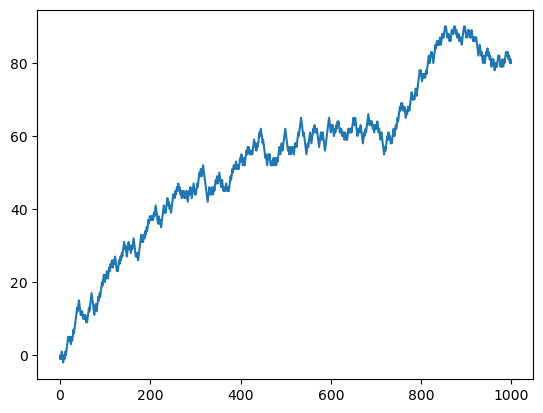

In [117]:
plt.plot(walk)

In [118]:
walk.min(), walk.max()

(-2, 90)